## 1. 필요한 패키지 로드

In [441]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import glob
from sklearn.preprocessing import OneHotEncoder
import random

## 2. 파일 불러오기

In [442]:
path = 'C:/Users/user/Desktop/16017005/Leisure'

In [443]:
import os
os.listdir(path)

['.ipynb_checkpoints',
 'catboost_info',
 'Leisure_EDA-Copy1.ipynb',
 'Leisure_EDA-Copy2.ipynb',
 'Leisure_EDA-Copy3.ipynb',
 'Leisure_EDA.ipynb',
 'Leisure_Modeling-Copy1.ipynb',
 'Leisure_Modeling-Copy2.ipynb',
 'Leisure_Modeling.ipynb',
 'logs.log',
 'nlas2020_newdata2.csv',
 'nlas2020_newdata_cat.csv',
 'nlas2020_newdata_py.csv',
 'nlas2020_revised.csv']

In [444]:
data = pd.read_csv(path+'/nlas2020_revised.csv',engine='python')
#http://stat.mcst.go.kr/mcst/WebPortal/public/main/main.html 다운로드 주소

In [445]:
data

,ID,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 1. 전시회 관람(미술, 사진, 건축, 디자인 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 2. 박물관 관람,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 3. 음악연주회 관람(클래식, 오페라 등)","문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 4. 전통예술공연 관람(국악, 민속놀이 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 5. 연극공연 관람(뮤지컬 포함),문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 6. 무용공연 관람,문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 7. 영화관람,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 8. 연예공연 관람(쇼, 콘서트, 마술 쇼 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 99. 보기 중 경험한 활동 없음,문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 9. 문학행사참여,문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 10. 글짓기/독서토론,"문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 11. 미술활동(그림, 서예, 조각, 디자인, 도예, 만화 등)",문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 12. 악기연주/노래교실,"문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 13. 전통예술 배우기(사물놀이, 줄타기 등)",문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 14. 사진촬영(디지털카메라 포함),"문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 15. 춤/무용(발레, 한국무용, 현대무용, 방송댄스, 스트릿댄스, 비보잉 등)",문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 99. 보기 중 경험한 활동 없음,"문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 16. 스포츠 경기 직접관람- 경기장방문관람(축구, 야구, 농구, 배구 등)","문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 17. 스포츠 경기 간접관람- TV, DMB를 통한관람(축구, 야구, 농구, 배구 등)","문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 18. 격투 스포츠 경기관람(태권도, 유도, 합기도, 검도, 권투 등)",문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 19. 온라인게임 경기관람(e-스포츠 경기 포함),문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 99. 보기 중 경험한 활동 없음,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 20. 농구, 배구, 야구, 축구, 족구","문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 21. 테니스, 스쿼시",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 22. 당구/포켓볼,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 23. 볼링, 탁구",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 24. 골프,문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 25. 수영,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 26. 윈드서핑, 수상스키, 스킨스쿠버다이빙, 래프팅, 요트","문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 27. 스노보드, 스키 등","문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 28. 아이스스케이트, 아이스하키 등",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 29. 헬스(보디빌딩)/에어로빅,문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 30. 요가/필라테스/태보,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 31. 배드민턴/줄넘기/맨손,스트레칭 체조/훌라후프",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 32. 육상/조깅/속보,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 33. 격투 스포츠(태권도, 유도, 합기도, 검도, 권투 등)","문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 34. 댄스스포츠(탱고, 왈츠, 자이브, 맘보,폴카, 차차차 등)",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 35. 사이클링/산악자전거,문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 36. 인라인스케이트,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 37. 승마, 암벽등반, 철인삼종경기, 서바이벌",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 99. 보기 중 경험한 활동 없음,"문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 38. 문화유적방문(고궁, 절, 유적지 등)",문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 39. 자연명승 및 풍경 관람,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 40. 삼림욕,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 41. 국내캠핑,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 42. 해외여행,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 43. 소풍/야유회,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 44. 온천/해수욕,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 45. 유람선 타기,...,문41.만 나이,문42.전체 동거 가구원 수,문42-1.동거 자녀 현황 - 복수응답 1,문42-1.동거 자녀 현황 - 복수응답 2,문42-1.동거 자녀 현황 - 복수응답 3,문42-1.동거 자녀 현황 - 복수응답 4,문42-1.미취학아동 자녀 수,문42-1.취학 자녀 수,문42-1.성인 자녀 수,문43.가구주 여부,문43.가구주와의 관계,문43.응답자 성별,문43.가구주의 성별,문43.가구주의 학력 - 최종학력,문43.가구주의 학력 - 이수여부,문44-1.응답자 장애등록 여부,문44-1.응답자 장애등록 유형,문44-1.응답자 장애등록 유형.1,문44-1.응답자 장애등록 유형.2,문44-1.응답자 장애등록 유형.3,문44-1.응답자 장애등록 유형.4,문44-2.응답자 본인 외 가족 장애등록 여부,문44-2.응답자 본인 외 가족 장애등록 유형,문44-2.응답자 본인 외 가족 장애등록 유형.1,문44-2.응답자 본인 외 가족 장애등록 유형.2,문44-2.응답자 본인 외 가족 장애등록 유형.3,문44-2.응답자 본인 외 가족 장애등록 유형.4,문45.지난 1주일 간 경제활동 여부,문45.경제활동 한 경우 직업 - 주업,문45.경제활동 한 경우 직업 - 부업,문45.경제활동 없는 경우 - 직업,문46.종사상의 지위,문47.주당 평균 근무 시간,문48.현재 근무지 주 5일제 시행 여부,문49.지난 1년 간 세금 공제 전 월 평균 소득- 본인,문49.지난 1년 간 세금 공제 전 월 평균 소득- 가구,최종가중값,성별,연령,학력,동거 가구원수,혼인상태,가구주 여부,종사자 지위,가구 소득,지역규모,권역,지역(시도),지역(시군구),장애여부
0,2,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,38.0,39.0,40.0,NaN,Na

In [446]:
# 사전 결측치 처리 (문40. 혼인상태)

In [447]:
data.loc[[1138, 8398, 7080],['ID','문40.혼인상태']] #5번의 경우 = 기타, 9번의 경우 = 응닶없음으로 결측값으로 처리.

,ID,문40.혼인상태
1138,4541,5
8398,3146,5
7080,9318,9


In [448]:
a=data.loc[[1138, 8398, 7080]]

In [449]:
a

,ID,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 1. 전시회 관람(미술, 사진, 건축, 디자인 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 2. 박물관 관람,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 3. 음악연주회 관람(클래식, 오페라 등)","문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 4. 전통예술공연 관람(국악, 민속놀이 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 5. 연극공연 관람(뮤지컬 포함),문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 6. 무용공연 관람,문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 7. 영화관람,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 8. 연예공연 관람(쇼, 콘서트, 마술 쇼 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 99. 보기 중 경험한 활동 없음,문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 9. 문학행사참여,문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 10. 글짓기/독서토론,"문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 11. 미술활동(그림, 서예, 조각, 디자인, 도예, 만화 등)",문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 12. 악기연주/노래교실,"문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 13. 전통예술 배우기(사물놀이, 줄타기 등)",문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 14. 사진촬영(디지털카메라 포함),"문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 15. 춤/무용(발레, 한국무용, 현대무용, 방송댄스, 스트릿댄스, 비보잉 등)",문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 99. 보기 중 경험한 활동 없음,"문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 16. 스포츠 경기 직접관람- 경기장방문관람(축구, 야구, 농구, 배구 등)","문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 17. 스포츠 경기 간접관람- TV, DMB를 통한관람(축구, 야구, 농구, 배구 등)","문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 18. 격투 스포츠 경기관람(태권도, 유도, 합기도, 검도, 권투 등)",문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 19. 온라인게임 경기관람(e-스포츠 경기 포함),문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 99. 보기 중 경험한 활동 없음,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 20. 농구, 배구, 야구, 축구, 족구","문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 21. 테니스, 스쿼시",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 22. 당구/포켓볼,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 23. 볼링, 탁구",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 24. 골프,문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 25. 수영,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 26. 윈드서핑, 수상스키, 스킨스쿠버다이빙, 래프팅, 요트","문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 27. 스노보드, 스키 등","문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 28. 아이스스케이트, 아이스하키 등",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 29. 헬스(보디빌딩)/에어로빅,문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 30. 요가/필라테스/태보,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 31. 배드민턴/줄넘기/맨손,스트레칭 체조/훌라후프",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 32. 육상/조깅/속보,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 33. 격투 스포츠(태권도, 유도, 합기도, 검도, 권투 등)","문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 34. 댄스스포츠(탱고, 왈츠, 자이브, 맘보,폴카, 차차차 등)",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 35. 사이클링/산악자전거,문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 36. 인라인스케이트,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 37. 승마, 암벽등반, 철인삼종경기, 서바이벌",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 99. 보기 중 경험한 활동 없음,"문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 38. 문화유적방문(고궁, 절, 유적지 등)",문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 39. 자연명승 및 풍경 관람,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 40. 삼림욕,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 41. 국내캠핑,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 42. 해외여행,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 43. 소풍/야유회,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 44. 온천/해수욕,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 45. 유람선 타기,...,문41.만 나이,문42.전체 동거 가구원 수,문42-1.동거 자녀 현황 - 복수응답 1,문42-1.동거 자녀 현황 - 복수응답 2,문42-1.동거 자녀 현황 - 복수응답 3,문42-1.동거 자녀 현황 - 복수응답 4,문42-1.미취학아동 자녀 수,문42-1.취학 자녀 수,문42-1.성인 자녀 수,문43.가구주 여부,문43.가구주와의 관계,문43.응답자 성별,문43.가구주의 성별,문43.가구주의 학력 - 최종학력,문43.가구주의 학력 - 이수여부,문44-1.응답자 장애등록 여부,문44-1.응답자 장애등록 유형,문44-1.응답자 장애등록 유형.1,문44-1.응답자 장애등록 유형.2,문44-1.응답자 장애등록 유형.3,문44-1.응답자 장애등록 유형.4,문44-2.응답자 본인 외 가족 장애등록 여부,문44-2.응답자 본인 외 가족 장애등록 유형,문44-2.응답자 본인 외 가족 장애등록 유형.1,문44-2.응답자 본인 외 가족 장애등록 유형.2,문44-2.응답자 본인 외 가족 장애등록 유형.3,문44-2.응답자 본인 외 가족 장애등록 유형.4,문45.지난 1주일 간 경제활동 여부,문45.경제활동 한 경우 직업 - 주업,문45.경제활동 한 경우 직업 - 부업,문45.경제활동 없는 경우 - 직업,문46.종사상의 지위,문47.주당 평균 근무 시간,문48.현재 근무지 주 5일제 시행 여부,문49.지난 1년 간 세금 공제 전 월 평균 소득- 본인,문49.지난 1년 간 세금 공제 전 월 평균 소득- 가구,최종가중값,성별,연령,학력,동거 가구원수,혼인상태,가구주 여부,종사자 지위,가구 소득,지역규모,권역,지역(시도),지역(시군구),장애여부
1138,4541,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,NaN,41

In [450]:
data=data.drop([1138, 8398, 7080],axis=0) #해당 행을 결측값 처리

In [451]:
data

,ID,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 1. 전시회 관람(미술, 사진, 건축, 디자인 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 2. 박물관 관람,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 3. 음악연주회 관람(클래식, 오페라 등)","문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 4. 전통예술공연 관람(국악, 민속놀이 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 5. 연극공연 관람(뮤지컬 포함),문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 6. 무용공연 관람,문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 7. 영화관람,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 8. 연예공연 관람(쇼, 콘서트, 마술 쇼 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 99. 보기 중 경험한 활동 없음,문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 9. 문학행사참여,문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 10. 글짓기/독서토론,"문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 11. 미술활동(그림, 서예, 조각, 디자인, 도예, 만화 등)",문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 12. 악기연주/노래교실,"문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 13. 전통예술 배우기(사물놀이, 줄타기 등)",문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 14. 사진촬영(디지털카메라 포함),"문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 15. 춤/무용(발레, 한국무용, 현대무용, 방송댄스, 스트릿댄스, 비보잉 등)",문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 99. 보기 중 경험한 활동 없음,"문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 16. 스포츠 경기 직접관람- 경기장방문관람(축구, 야구, 농구, 배구 등)","문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 17. 스포츠 경기 간접관람- TV, DMB를 통한관람(축구, 야구, 농구, 배구 등)","문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 18. 격투 스포츠 경기관람(태권도, 유도, 합기도, 검도, 권투 등)",문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 19. 온라인게임 경기관람(e-스포츠 경기 포함),문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 99. 보기 중 경험한 활동 없음,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 20. 농구, 배구, 야구, 축구, 족구","문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 21. 테니스, 스쿼시",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 22. 당구/포켓볼,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 23. 볼링, 탁구",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 24. 골프,문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 25. 수영,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 26. 윈드서핑, 수상스키, 스킨스쿠버다이빙, 래프팅, 요트","문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 27. 스노보드, 스키 등","문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 28. 아이스스케이트, 아이스하키 등",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 29. 헬스(보디빌딩)/에어로빅,문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 30. 요가/필라테스/태보,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 31. 배드민턴/줄넘기/맨손,스트레칭 체조/훌라후프",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 32. 육상/조깅/속보,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 33. 격투 스포츠(태권도, 유도, 합기도, 검도, 권투 등)","문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 34. 댄스스포츠(탱고, 왈츠, 자이브, 맘보,폴카, 차차차 등)",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 35. 사이클링/산악자전거,문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 36. 인라인스케이트,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 37. 승마, 암벽등반, 철인삼종경기, 서바이벌",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 99. 보기 중 경험한 활동 없음,"문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 38. 문화유적방문(고궁, 절, 유적지 등)",문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 39. 자연명승 및 풍경 관람,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 40. 삼림욕,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 41. 국내캠핑,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 42. 해외여행,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 43. 소풍/야유회,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 44. 온천/해수욕,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 45. 유람선 타기,...,문41.만 나이,문42.전체 동거 가구원 수,문42-1.동거 자녀 현황 - 복수응답 1,문42-1.동거 자녀 현황 - 복수응답 2,문42-1.동거 자녀 현황 - 복수응답 3,문42-1.동거 자녀 현황 - 복수응답 4,문42-1.미취학아동 자녀 수,문42-1.취학 자녀 수,문42-1.성인 자녀 수,문43.가구주 여부,문43.가구주와의 관계,문43.응답자 성별,문43.가구주의 성별,문43.가구주의 학력 - 최종학력,문43.가구주의 학력 - 이수여부,문44-1.응답자 장애등록 여부,문44-1.응답자 장애등록 유형,문44-1.응답자 장애등록 유형.1,문44-1.응답자 장애등록 유형.2,문44-1.응답자 장애등록 유형.3,문44-1.응답자 장애등록 유형.4,문44-2.응답자 본인 외 가족 장애등록 여부,문44-2.응답자 본인 외 가족 장애등록 유형,문44-2.응답자 본인 외 가족 장애등록 유형.1,문44-2.응답자 본인 외 가족 장애등록 유형.2,문44-2.응답자 본인 외 가족 장애등록 유형.3,문44-2.응답자 본인 외 가족 장애등록 유형.4,문45.지난 1주일 간 경제활동 여부,문45.경제활동 한 경우 직업 - 주업,문45.경제활동 한 경우 직업 - 부업,문45.경제활동 없는 경우 - 직업,문46.종사상의 지위,문47.주당 평균 근무 시간,문48.현재 근무지 주 5일제 시행 여부,문49.지난 1년 간 세금 공제 전 월 평균 소득- 본인,문49.지난 1년 간 세금 공제 전 월 평균 소득- 가구,최종가중값,성별,연령,학력,동거 가구원수,혼인상태,가구주 여부,종사자 지위,가구 소득,지역규모,권역,지역(시도),지역(시군구),장애여부
0,2,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,38.0,39.0,40.0,NaN,Na

## 3. EDA

### 1. 연령 20~30대만 추출

In [452]:
data1=data[data['연령'].isin([2,3])]

In [453]:
data1

,ID,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 1. 전시회 관람(미술, 사진, 건축, 디자인 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 2. 박물관 관람,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 3. 음악연주회 관람(클래식, 오페라 등)","문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 4. 전통예술공연 관람(국악, 민속놀이 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 5. 연극공연 관람(뮤지컬 포함),문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 6. 무용공연 관람,문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 7. 영화관람,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 8. 연예공연 관람(쇼, 콘서트, 마술 쇼 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 99. 보기 중 경험한 활동 없음,문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 9. 문학행사참여,문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 10. 글짓기/독서토론,"문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 11. 미술활동(그림, 서예, 조각, 디자인, 도예, 만화 등)",문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 12. 악기연주/노래교실,"문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 13. 전통예술 배우기(사물놀이, 줄타기 등)",문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 14. 사진촬영(디지털카메라 포함),"문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 15. 춤/무용(발레, 한국무용, 현대무용, 방송댄스, 스트릿댄스, 비보잉 등)",문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 99. 보기 중 경험한 활동 없음,"문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 16. 스포츠 경기 직접관람- 경기장방문관람(축구, 야구, 농구, 배구 등)","문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 17. 스포츠 경기 간접관람- TV, DMB를 통한관람(축구, 야구, 농구, 배구 등)","문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 18. 격투 스포츠 경기관람(태권도, 유도, 합기도, 검도, 권투 등)",문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 19. 온라인게임 경기관람(e-스포츠 경기 포함),문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 99. 보기 중 경험한 활동 없음,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 20. 농구, 배구, 야구, 축구, 족구","문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 21. 테니스, 스쿼시",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 22. 당구/포켓볼,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 23. 볼링, 탁구",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 24. 골프,문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 25. 수영,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 26. 윈드서핑, 수상스키, 스킨스쿠버다이빙, 래프팅, 요트","문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 27. 스노보드, 스키 등","문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 28. 아이스스케이트, 아이스하키 등",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 29. 헬스(보디빌딩)/에어로빅,문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 30. 요가/필라테스/태보,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 31. 배드민턴/줄넘기/맨손,스트레칭 체조/훌라후프",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 32. 육상/조깅/속보,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 33. 격투 스포츠(태권도, 유도, 합기도, 검도, 권투 등)","문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 34. 댄스스포츠(탱고, 왈츠, 자이브, 맘보,폴카, 차차차 등)",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 35. 사이클링/산악자전거,문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 36. 인라인스케이트,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 37. 승마, 암벽등반, 철인삼종경기, 서바이벌",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 99. 보기 중 경험한 활동 없음,"문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 38. 문화유적방문(고궁, 절, 유적지 등)",문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 39. 자연명승 및 풍경 관람,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 40. 삼림욕,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 41. 국내캠핑,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 42. 해외여행,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 43. 소풍/야유회,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 44. 온천/해수욕,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 45. 유람선 타기,...,문41.만 나이,문42.전체 동거 가구원 수,문42-1.동거 자녀 현황 - 복수응답 1,문42-1.동거 자녀 현황 - 복수응답 2,문42-1.동거 자녀 현황 - 복수응답 3,문42-1.동거 자녀 현황 - 복수응답 4,문42-1.미취학아동 자녀 수,문42-1.취학 자녀 수,문42-1.성인 자녀 수,문43.가구주 여부,문43.가구주와의 관계,문43.응답자 성별,문43.가구주의 성별,문43.가구주의 학력 - 최종학력,문43.가구주의 학력 - 이수여부,문44-1.응답자 장애등록 여부,문44-1.응답자 장애등록 유형,문44-1.응답자 장애등록 유형.1,문44-1.응답자 장애등록 유형.2,문44-1.응답자 장애등록 유형.3,문44-1.응답자 장애등록 유형.4,문44-2.응답자 본인 외 가족 장애등록 여부,문44-2.응답자 본인 외 가족 장애등록 유형,문44-2.응답자 본인 외 가족 장애등록 유형.1,문44-2.응답자 본인 외 가족 장애등록 유형.2,문44-2.응답자 본인 외 가족 장애등록 유형.3,문44-2.응답자 본인 외 가족 장애등록 유형.4,문45.지난 1주일 간 경제활동 여부,문45.경제활동 한 경우 직업 - 주업,문45.경제활동 한 경우 직업 - 부업,문45.경제활동 없는 경우 - 직업,문46.종사상의 지위,문47.주당 평균 근무 시간,문48.현재 근무지 주 5일제 시행 여부,문49.지난 1년 간 세금 공제 전 월 평균 소득- 본인,문49.지난 1년 간 세금 공제 전 월 평균 소득- 가구,최종가중값,성별,연령,학력,동거 가구원수,혼인상태,가구주 여부,종사자 지위,가구 소득,지역규모,권역,지역(시도),지역(시군구),장애여부
73,206,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN,N

### 2. 지난 1년간 1번 이상 참여한 여가활동 자료 처리

In [454]:
data2 = data1.iloc[:, 1:97]
data2

,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 1. 전시회 관람(미술, 사진, 건축, 디자인 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 2. 박물관 관람,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 3. 음악연주회 관람(클래식, 오페라 등)","문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 4. 전통예술공연 관람(국악, 민속놀이 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 5. 연극공연 관람(뮤지컬 포함),문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 6. 무용공연 관람,문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 7. 영화관람,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 8. 연예공연 관람(쇼, 콘서트, 마술 쇼 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 99. 보기 중 경험한 활동 없음,문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 9. 문학행사참여,문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 10. 글짓기/독서토론,"문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 11. 미술활동(그림, 서예, 조각, 디자인, 도예, 만화 등)",문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 12. 악기연주/노래교실,"문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 13. 전통예술 배우기(사물놀이, 줄타기 등)",문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 14. 사진촬영(디지털카메라 포함),"문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 15. 춤/무용(발레, 한국무용, 현대무용, 방송댄스, 스트릿댄스, 비보잉 등)",문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 99. 보기 중 경험한 활동 없음,"문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 16. 스포츠 경기 직접관람- 경기장방문관람(축구, 야구, 농구, 배구 등)","문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 17. 스포츠 경기 간접관람- TV, DMB를 통한관람(축구, 야구, 농구, 배구 등)","문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 18. 격투 스포츠 경기관람(태권도, 유도, 합기도, 검도, 권투 등)",문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 19. 온라인게임 경기관람(e-스포츠 경기 포함),문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 99. 보기 중 경험한 활동 없음,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 20. 농구, 배구, 야구, 축구, 족구","문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 21. 테니스, 스쿼시",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 22. 당구/포켓볼,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 23. 볼링, 탁구",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 24. 골프,문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 25. 수영,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 26. 윈드서핑, 수상스키, 스킨스쿠버다이빙, 래프팅, 요트","문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 27. 스노보드, 스키 등","문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 28. 아이스스케이트, 아이스하키 등",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 29. 헬스(보디빌딩)/에어로빅,문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 30. 요가/필라테스/태보,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 31. 배드민턴/줄넘기/맨손,스트레칭 체조/훌라후프",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 32. 육상/조깅/속보,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 33. 격투 스포츠(태권도, 유도, 합기도, 검도, 권투 등)","문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 34. 댄스스포츠(탱고, 왈츠, 자이브, 맘보,폴카, 차차차 등)",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 35. 사이클링/산악자전거,문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 36. 인라인스케이트,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 37. 승마, 암벽등반, 철인삼종경기, 서바이벌",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 99. 보기 중 경험한 활동 없음,"문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 38. 문화유적방문(고궁, 절, 유적지 등)",문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 39. 자연명승 및 풍경 관람,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 40. 삼림욕,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 41. 국내캠핑,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 42. 해외여행,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 43. 소풍/야유회,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 44. 온천/해수욕,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 45. 유람선 타기,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 46. 테마파크가기/놀이공원/동물원/식물원 가기,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 47. 지역축제 참가,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 48. 자동차 드라이브,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 99. 보기 중 경험한 활동 없음,문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 49. 수집활동(스크랩 포함),"문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 50. 생활공예(십자수, 비즈공예, DIY, 꽃꽃이 등)",문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 51. 요리하기/다도,문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 52. 반려동물 돌보기,문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 53. 노래방 가기,"문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 54. 인테리어(집,자동차 등)",문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 55. 등산,문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 56. 낚시,문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 57. 홈페이지/블로그 관리,문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 58. 인터넷 검색/1인 미디어 제작/SNS,문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 59. 게임(온라인/모바일/콘솔게임 등),문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 60. 보드게임/퍼즐/큐브 맞추기,문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 61. 바둑/장기/체스,"문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 62. 겜블(경마, 경륜, 카지노, 카드놀이

## 리코딩 설명

### 1. 해당 자료의 항목은 각각 다음과 같이 나뉜다.

A. 문화예술관람활동, B. 문화예술참여활동, C. 스포츠관람활동, D. 스포츠참여활동, E. 관광활동, F. 취미오락활동, G. 휴식활동, H. 사회 및 기타활동

#### 


### 2. B항목의 경우, 실제로는 문화예술'참여'활동이지만, csv파일에서는 문화예술'관람'활동으로 오기재되었다.

#### 


### 3. 각 활동별로 참여했다고 응답한 사람은 해당하는 해당 변수에 설문지 번호로 입력되어있다.


ex) 설문지의 7번 항목, 영화관람을 참여했다고 응답한 사람은 7로 입력.

설문지의 36번 항목, 인라인스테이트를 참여했다고 응답한 사람은 36으로 입력.


#### 


### 4. 1번의 항목 중에서 아무것도 하지 않은 사람은 각 항목의 맨 첫번째 칼럼에 99라고 입력되어있다.

ex) 설문지에서 문화예술관람활동을 아무것도 하지 않았다고 응답한 사람의 경우

→ 문화예술관람활동에서 맨 처음 칼럼인 '1. 전시회 관람' 칼럼에 99로 입력.



####  


설문지에서 스포츠관람활동을 아무것도 하지 않았다고 응답한 사람의 경우 

→ 스포츠관람활동에서 맨 처음 칼럼인 '16. 스포츠 경기 직접 관람' 칼럼에 99로 입력.


#### 

### 5. 각 항목별로 '99. 보기 중 경험한 활동 없음' 이라고 적힌 칼럼들은 실제로는 아무것도 기재되지 않은 더미칼럼이다.



"""

#### 2-A. 해당없음 값 99를 0으로 변환.

In [455]:
data2.loc[data2['문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 1. 전시회 관람(미술, 사진, 건축, 디자인 등)']== 99, '문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 1. 전시회 관람(미술, 사진, 건축, 디자인 등)'] = 0
data2.loc[data2['문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 9. 문학행사참여']== 99, '문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 9. 문학행사참여'] = 0
data2.loc[data2['문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 16. 스포츠 경기 직접관람- 경기장방문관람(축구, 야구, 농구, 배구 등)']== 99, '문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 16. 스포츠 경기 직접관람- 경기장방문관람(축구, 야구, 농구, 배구 등)'] = 0
data2.loc[data2['문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 20. 농구, 배구, 야구, 축구, 족구']== 99, '문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 20. 농구, 배구, 야구, 축구, 족구'] = 0
data2.loc[data2['문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 38. 문화유적방문(고궁, 절, 유적지 등)']== 99, '문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 38. 문화유적방문(고궁, 절, 유적지 등)'] = 0
data2.loc[data2['문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 49. 수집활동(스크랩 포함)']== 99, '문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 49. 수집활동(스크랩 포함)'] = 0
data2.loc[data2['문1.한 번 이상 참여한 여가활동 - G. 휴식활동(복수응답) - 71. 산책 및 걷기']== 99, '문1.한 번 이상 참여한 여가활동 - G. 휴식활동(복수응답) - 71. 산책 및 걷기'] = 0
data2.loc[data2['문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 80. 사회봉사활동']== 99, '문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 80. 사회봉사활동'] = 0

In [456]:
data2

,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 1. 전시회 관람(미술, 사진, 건축, 디자인 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 2. 박물관 관람,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 3. 음악연주회 관람(클래식, 오페라 등)","문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 4. 전통예술공연 관람(국악, 민속놀이 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 5. 연극공연 관람(뮤지컬 포함),문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 6. 무용공연 관람,문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 7. 영화관람,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 8. 연예공연 관람(쇼, 콘서트, 마술 쇼 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 99. 보기 중 경험한 활동 없음,문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 9. 문학행사참여,문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 10. 글짓기/독서토론,"문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 11. 미술활동(그림, 서예, 조각, 디자인, 도예, 만화 등)",문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 12. 악기연주/노래교실,"문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 13. 전통예술 배우기(사물놀이, 줄타기 등)",문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 14. 사진촬영(디지털카메라 포함),"문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 15. 춤/무용(발레, 한국무용, 현대무용, 방송댄스, 스트릿댄스, 비보잉 등)",문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 99. 보기 중 경험한 활동 없음,"문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 16. 스포츠 경기 직접관람- 경기장방문관람(축구, 야구, 농구, 배구 등)","문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 17. 스포츠 경기 간접관람- TV, DMB를 통한관람(축구, 야구, 농구, 배구 등)","문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 18. 격투 스포츠 경기관람(태권도, 유도, 합기도, 검도, 권투 등)",문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 19. 온라인게임 경기관람(e-스포츠 경기 포함),문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 99. 보기 중 경험한 활동 없음,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 20. 농구, 배구, 야구, 축구, 족구","문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 21. 테니스, 스쿼시",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 22. 당구/포켓볼,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 23. 볼링, 탁구",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 24. 골프,문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 25. 수영,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 26. 윈드서핑, 수상스키, 스킨스쿠버다이빙, 래프팅, 요트","문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 27. 스노보드, 스키 등","문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 28. 아이스스케이트, 아이스하키 등",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 29. 헬스(보디빌딩)/에어로빅,문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 30. 요가/필라테스/태보,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 31. 배드민턴/줄넘기/맨손,스트레칭 체조/훌라후프",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 32. 육상/조깅/속보,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 33. 격투 스포츠(태권도, 유도, 합기도, 검도, 권투 등)","문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 34. 댄스스포츠(탱고, 왈츠, 자이브, 맘보,폴카, 차차차 등)",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 35. 사이클링/산악자전거,문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 36. 인라인스케이트,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 37. 승마, 암벽등반, 철인삼종경기, 서바이벌",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 99. 보기 중 경험한 활동 없음,"문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 38. 문화유적방문(고궁, 절, 유적지 등)",문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 39. 자연명승 및 풍경 관람,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 40. 삼림욕,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 41. 국내캠핑,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 42. 해외여행,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 43. 소풍/야유회,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 44. 온천/해수욕,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 45. 유람선 타기,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 46. 테마파크가기/놀이공원/동물원/식물원 가기,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 47. 지역축제 참가,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 48. 자동차 드라이브,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 99. 보기 중 경험한 활동 없음,문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 49. 수집활동(스크랩 포함),"문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 50. 생활공예(십자수, 비즈공예, DIY, 꽃꽃이 등)",문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 51. 요리하기/다도,문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 52. 반려동물 돌보기,문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 53. 노래방 가기,"문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 54. 인테리어(집,자동차 등)",문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 55. 등산,문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 56. 낚시,문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 57. 홈페이지/블로그 관리,문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 58. 인터넷 검색/1인 미디어 제작/SNS,문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 59. 게임(온라인/모바일/콘솔게임 등),문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 60. 보드게임/퍼즐/큐브 맞추기,문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 61. 바둑/장기/체스,"문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 62. 겜블(경마, 경륜, 카지노, 카드놀이

#### 2-B. 개별값 변수 리코딩 (참여 =1, 미참여 =0)

In [457]:
data3 = data2.replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89],[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])

In [458]:
data3

,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 1. 전시회 관람(미술, 사진, 건축, 디자인 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 2. 박물관 관람,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 3. 음악연주회 관람(클래식, 오페라 등)","문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 4. 전통예술공연 관람(국악, 민속놀이 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 5. 연극공연 관람(뮤지컬 포함),문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 6. 무용공연 관람,문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 7. 영화관람,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 8. 연예공연 관람(쇼, 콘서트, 마술 쇼 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 99. 보기 중 경험한 활동 없음,문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 9. 문학행사참여,문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 10. 글짓기/독서토론,"문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 11. 미술활동(그림, 서예, 조각, 디자인, 도예, 만화 등)",문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 12. 악기연주/노래교실,"문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 13. 전통예술 배우기(사물놀이, 줄타기 등)",문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 14. 사진촬영(디지털카메라 포함),"문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 15. 춤/무용(발레, 한국무용, 현대무용, 방송댄스, 스트릿댄스, 비보잉 등)",문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 99. 보기 중 경험한 활동 없음,"문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 16. 스포츠 경기 직접관람- 경기장방문관람(축구, 야구, 농구, 배구 등)","문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 17. 스포츠 경기 간접관람- TV, DMB를 통한관람(축구, 야구, 농구, 배구 등)","문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 18. 격투 스포츠 경기관람(태권도, 유도, 합기도, 검도, 권투 등)",문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 19. 온라인게임 경기관람(e-스포츠 경기 포함),문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 99. 보기 중 경험한 활동 없음,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 20. 농구, 배구, 야구, 축구, 족구","문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 21. 테니스, 스쿼시",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 22. 당구/포켓볼,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 23. 볼링, 탁구",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 24. 골프,문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 25. 수영,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 26. 윈드서핑, 수상스키, 스킨스쿠버다이빙, 래프팅, 요트","문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 27. 스노보드, 스키 등","문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 28. 아이스스케이트, 아이스하키 등",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 29. 헬스(보디빌딩)/에어로빅,문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 30. 요가/필라테스/태보,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 31. 배드민턴/줄넘기/맨손,스트레칭 체조/훌라후프",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 32. 육상/조깅/속보,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 33. 격투 스포츠(태권도, 유도, 합기도, 검도, 권투 등)","문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 34. 댄스스포츠(탱고, 왈츠, 자이브, 맘보,폴카, 차차차 등)",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 35. 사이클링/산악자전거,문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 36. 인라인스케이트,"문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 37. 승마, 암벽등반, 철인삼종경기, 서바이벌",문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 99. 보기 중 경험한 활동 없음,"문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 38. 문화유적방문(고궁, 절, 유적지 등)",문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 39. 자연명승 및 풍경 관람,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 40. 삼림욕,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 41. 국내캠핑,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 42. 해외여행,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 43. 소풍/야유회,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 44. 온천/해수욕,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 45. 유람선 타기,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 46. 테마파크가기/놀이공원/동물원/식물원 가기,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 47. 지역축제 참가,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 48. 자동차 드라이브,문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 99. 보기 중 경험한 활동 없음,문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 49. 수집활동(스크랩 포함),"문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 50. 생활공예(십자수, 비즈공예, DIY, 꽃꽃이 등)",문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 51. 요리하기/다도,문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 52. 반려동물 돌보기,문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 53. 노래방 가기,"문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 54. 인테리어(집,자동차 등)",문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 55. 등산,문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 56. 낚시,문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 57. 홈페이지/블로그 관리,문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 58. 인터넷 검색/1인 미디어 제작/SNS,문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 59. 게임(온라인/모바일/콘솔게임 등),문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 60. 보드게임/퍼즐/큐브 맞추기,문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 61. 바둑/장기/체스,"문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 62. 겜블(경마, 경륜, 카지노, 카드놀이

#### 2-C. 지난 1년 간 1번 이상 참여한 여가활동의 총합 및 정규화 (최솟값 = 0, 최댓값 = 1)

In [459]:
data3['문화예술'] = (data3.iloc[:, 0:17].sum(axis=1))/15
data3['스포츠'] = (data3.iloc[:, 17:41].sum(axis=1))/22
data3['관광'] = (data3.iloc[:, 41:53].sum(axis=1))/11
data3['취미오락'] = (data3.iloc[:, 53:76].sum(axis=1))/22
data3['휴식'] = (data3.iloc[:, 76:86].sum(axis=1))/9
data3['사회기타'] = (data3.iloc[:, 86:94].sum(axis=1))/8

In [460]:
data4=data3.iloc[:, 96:102]
data4

,문화예술,스포츠,관광,취미오락,휴식,사회기타
73,0.000000,0.000000,0.000000,0.272727,0.555556,0.250
79,0.000000,0.045455,0.363636,0.227273,0.444444,0.375
89,0.000000,0.000000,0.545455,0.318182,0.666667,0.375
90,0.000000,0.045455,0.454545,0.318182,0.777778,0.375
149,0.000000,0.045455,0.000000,0.227273,0.444444,0.250
...,...,...,...,...,...,...
10078,0.066667,0.090909,0.000000,0.136364,0.555556,0.625
10079,0.133333,0.090909,0.090909,0.090909,0.555556,0.125
10082,0.200000,0.409091,0.363636,0.363636,0.444444,0.500
10083,0.066667,0.136364,0.000000,0.272727,0.777778,0.625


In [461]:
data4.describe()

,문화예술,스포츠,관광,취미오락,휴식,사회기타
count,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000
mean,0.114699,0.104401,0.265488,0.265545,0.584199,0.400142
std,0.094324,0.093905,0.195839,0.123134,0.201777,0.145286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.066667,0.045455,0.090909,0.181818,0.444444,0.375000
50%,0.066667,0.090909,0.272727,0.272727,0.555556,0.375000
75%,0.133333,0.136364,0.363636,0.318182,0.777778,0.500000
max,0.733333,0.772727,1.000000,0.818182,1.000000,1.000000


#### 2-D. Boxplot

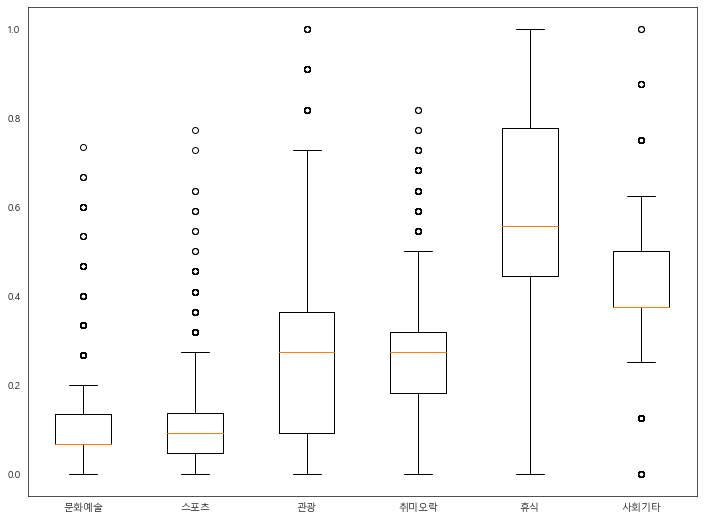

In [462]:
plt.figure(figsize=(12, 9))
plt.rc("font", family = "Malgun Gothic")
plt.boxplot(data4)
plt.xticks([1,2,3,4,5,6], ['문화예술', '스포츠', '관광', '취미오락', '휴식', '사회기타'])
plt.rc("font", family = "Malgun Gothic")
plt.show()

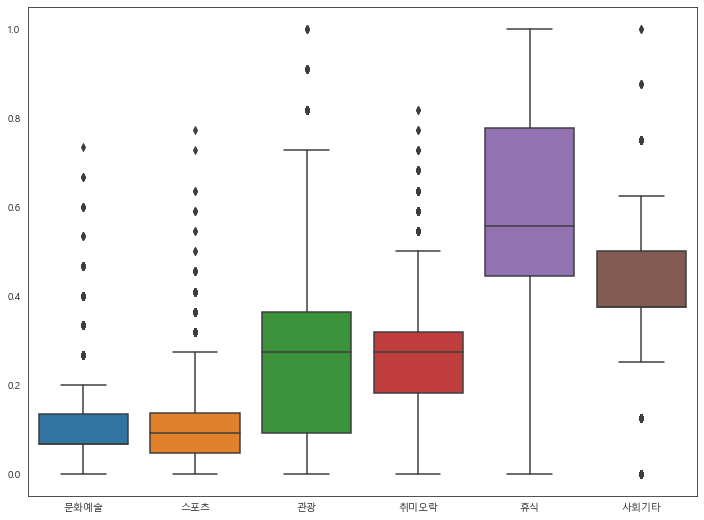

In [463]:
plt.rcParams['font.family'] = 'Malgun Gothic'
bxp=data4.loc[:,['문화예술', '스포츠', '관광', '취미오락', '휴식', '사회기타']]
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,9
fig, ax = plt.subplots()
sns.set_style('white')
bxp2 = sns.boxplot(data=bxp)
plt.rcParams['font.family'] = 'Malgun Gothic'

## 3. 여가활동비용 자료 처리

In [464]:
data5 = data1.loc[:,['문9.지난 1년간 여가활동을 위한 지출액(월 평균)']]
data5

,문9.지난 1년간 여가활동을 위한 지출액(월 평균)
73,100000
79,50000
89,100000
90,150000
149,300000
...,...
10078,100000
10079,500000
10082,200000
10083,100000


In [465]:
data5.describe()

,문9.지난 1년간 여가활동을 위한 지출액(월 평균)
count,3.177000e+03
mean,1.814105e+05
std,1.871988e+05
min,0.000000e+00
25%,6.000000e+04
50%,1.200000e+05
75%,2.500000e+05
max,5.100000e+06


In [466]:
data5.value_counts().sort_index()

문9.지난 1년간 여가활동을 위한 지출액(월 평균)
0                                20
1000                              1
3000                              1
5000                              5
10000                            43
15000                             5
20000                            64
20300                             1
25000                             4
26000                             1
30000                           179
35000                             2
40000                            35
45000                             1
50000                           422
53000                             1
55000                             1
60000                            43
70000                            58
75000                             1
80000                            43
85000                             1
90000                             3
100000                          639
110000                            2
120000                           18
130000                            6

#### 3-A. 결측값 확인

In [467]:
data5.isnull().any()

문9.지난 1년간 여가활동을 위한 지출액(월 평균)    False
dtype: bool

#### 3-B. 사분위수 범위 확인

In [468]:
print(data5.quantile(.25))
print(data5.quantile(.5))
print(data5.quantile(.75))

문9.지난 1년간 여가활동을 위한 지출액(월 평균)    60000.0
Name: 0.25, dtype: float64
문9.지난 1년간 여가활동을 위한 지출액(월 평균)    120000.0
Name: 0.5, dtype: float64
문9.지난 1년간 여가활동을 위한 지출액(월 평균)    250000.0
Name: 0.75, dtype: float64


#### 3-C. 사분위수 범위로 나누어 처리

In [469]:
data5.loc[data5['문9.지난 1년간 여가활동을 위한 지출액(월 평균)'] < 60000, '여가비용'] = "A"
data5.loc[data5['문9.지난 1년간 여가활동을 위한 지출액(월 평균)'] == 60000, '여가비용'] = "A"
data5.loc[data5['문9.지난 1년간 여가활동을 위한 지출액(월 평균)'] > 60000, '여가비용'] = "B"
data5.loc[data5['문9.지난 1년간 여가활동을 위한 지출액(월 평균)'] > 120000, '여가비용'] = "C"
data5.loc[data5['문9.지난 1년간 여가활동을 위한 지출액(월 평균)'] > 250000, '여가비용'] = "D"

In [470]:
data5

,문9.지난 1년간 여가활동을 위한 지출액(월 평균),여가비용
73,100000,B
79,50000,A
89,100000,B
90,150000,C
149,300000,D
...,...,...
10078,100000,B
10079,500000,D
10082,200000,C
10083,100000,B


In [471]:
data6 = data5.loc[:,['여가비용']]
data6

,여가비용
73,B
79,A
89,B
90,C
149,D
...,...
10078,B
10079,D
10082,C
10083,B


In [472]:
data5['여가비용'].value_counts()

C    843
A    829
B    765
D    740
Name: 여가비용, dtype: int64

In [473]:
data5['여가비용'].value_counts()/3177

C    0.265345
A    0.260938
B    0.240793
D    0.232924
Name: 여가비용, dtype: float64

#### 3-D. Boxplot

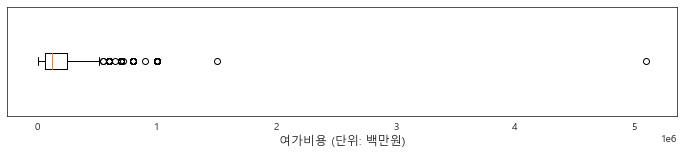

In [474]:
plt.figure(figsize=(12, 2))
plt.boxplot(data5['문9.지난 1년간 여가활동을 위한 지출액(월 평균)'], vert=False)
plt.xlabel("여가비용 (단위: 백만원)", size = 12)
plt.yticks([0], [''], size = 12)
plt.show()

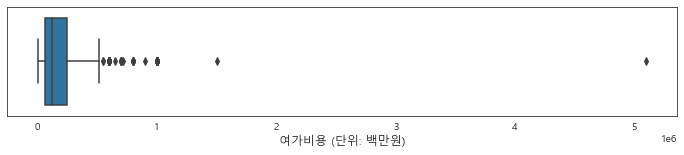

In [475]:
plt.rcParams['font.family'] = 'Malgun Gothic'
bxp=data5.loc[:,['문9.지난 1년간 여가활동을 위한 지출액(월 평균)']]
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,2
fig, ax = plt.subplots()
sns.set_style('white')
bxp2 = sns.boxplot(data=bxp, orient="h")
plt.xlabel("여가비용 (단위: 백만원)", size = 12)
plt.yticks([0], [''], size = 12)
plt.rcParams['font.family'] = 'Malgun Gothic'

In [476]:
data6 = pd.get_dummies(data6['여가비용'], drop_first=True, prefix='여가비용') 

In [477]:
data6

,여가비용_B,여가비용_C,여가비용_D
73,1,0,0
79,0,0,0
89,1,0,0
90,0,1,0
149,0,0,1
...,...,...,...
10078,1,0,0
10079,0,0,1
10082,0,1,0
10083,1,0,0


## 4. 여가활동시간 자료 처리

In [478]:
data7 = data1.loc[:,['문13.지난 1년 간 하루 평균 여가시간 - 평일', '문13.지난 1년 간 하루 평균 여가시간 - 휴일']]
data7['평일여가충분도'] = data1['문13.지난 1년 간 여가시간 충분도 - 평일']
data7['휴일여가충분도'] = data1['문13.지난 1년 간 여가시간 충분도 - 휴일']
data7

,문13.지난 1년 간 하루 평균 여가시간 - 평일,문13.지난 1년 간 하루 평균 여가시간 - 휴일,평일여가충분도,휴일여가충분도
73,10.0,10.0,6,6
79,10.0,15.0,6,6
89,2.0,3.0,1,1
90,2.0,5.0,2,4
149,5.0,10.0,7,7
...,...,...,...,...
10078,3.0,8.0,4,5
10079,4.0,6.0,4,5
10082,2.0,3.0,3,4
10083,3.0,8.0,3,7


In [479]:
data7.describe()

,문13.지난 1년 간 하루 평균 여가시간 - 평일,문13.지난 1년 간 하루 평균 여가시간 - 휴일,평일여가충분도,휴일여가충분도
count,3177.000000,3177.000000,3177.000000,3177.000000
mean,3.406862,5.757602,4.385899,4.926660
std,1.820250,2.779332,1.350773,1.329276
min,0.000000,0.000000,1.000000,1.000000
25%,2.000000,4.000000,4.000000,4.000000
50%,3.000000,5.000000,4.000000,5.000000
75%,4.000000,8.000000,5.000000,6.000000
max,16.000000,18.000000,7.000000,7.000000


In [480]:
data7['문13.지난 1년 간 하루 평균 여가시간 - 평일'].value_counts().sort_index()

0.0       1
0.3       1
0.5       3
1.0     286
1.3       2
1.5       4
2.0     784
2.5       7
2.7       1
3.0     836
3.3       1
3.5      11
4.0     562
4.2       3
4.5       6
4.6       1
4.8       1
4.9       1
5.0     325
5.2       2
5.3       3
5.4       2
5.5       7
5.7       1
5.8       1
6.0     161
6.5       1
6.8       1
7.0      46
7.4       1
8.0      56
8.5       1
9.0       6
10.0     42
12.0      4
13.0      1
14.0      1
15.0      3
16.0      1
Name: 문13.지난 1년 간 하루 평균 여가시간 - 평일, dtype: int64

In [481]:
data7['문13.지난 1년 간 하루 평균 여가시간 - 휴일'].value_counts().sort_index()

0.0       3
1.0      54
1.5       1
2.0     249
2.5       3
3.0     401
3.5       1
4.0     468
4.4       1
4.5       6
4.9       1
5.0     521
5.5       4
6.0     424
6.3       3
6.5       6
6.8       1
7.0     137
7.2       1
7.3       1
7.4       1
8.0     392
8.5       5
9.0      35
10.0    345
11.0      5
12.0     70
13.0      7
14.0      5
15.0     20
16.0      4
18.0      2
Name: 문13.지난 1년 간 하루 평균 여가시간 - 휴일, dtype: int64

In [482]:
data7['평일여가충분도'].value_counts().sort_index()

1      58
2     267
3     356
4    1049
5     777
6     497
7     173
Name: 평일여가충분도, dtype: int64

In [483]:
data7['휴일여가충분도'].value_counts().sort_index()

1     39
2    148
3    189
4    751
5    889
6    826
7    335
Name: 휴일여가충분도, dtype: int64

#### 4-A. 결측값 확인

In [484]:
data7.isnull().any()

문13.지난 1년 간 하루 평균 여가시간 - 평일    False
문13.지난 1년 간 하루 평균 여가시간 - 휴일    False
평일여가충분도                        False
휴일여가충분도                        False
dtype: bool

#### 4-B. 시간 단위로 나누어 처리. (1,3,5,7,9 시간)
국민여가활동조사 보고서를 참조하였음

In [485]:
data7.loc[data7['문13.지난 1년 간 하루 평균 여가시간 - 평일'] < 3, '평일여가시간'] = "A"
data7.loc[data7['문13.지난 1년 간 하루 평균 여가시간 - 평일'] == 3, '평일여가시간'] = "A"
data7.loc[data7['문13.지난 1년 간 하루 평균 여가시간 - 평일'] > 3, '평일여가시간'] = "B"
data7.loc[data7['문13.지난 1년 간 하루 평균 여가시간 - 평일'] > 5, '평일여가시간'] = "C"
data7.loc[data7['문13.지난 1년 간 하루 평균 여가시간 - 평일'] > 7, '평일여가시간'] = "D"
data7.loc[data7['문13.지난 1년 간 하루 평균 여가시간 - 평일'] > 9, '평일여가시간'] = "E"

data7.loc[data7['문13.지난 1년 간 하루 평균 여가시간 - 휴일'] < 3, '휴일여가시간'] = "A"
data7.loc[data7['문13.지난 1년 간 하루 평균 여가시간 - 휴일'] == 3, '휴일여가시간'] = "A"
data7.loc[data7['문13.지난 1년 간 하루 평균 여가시간 - 휴일'] > 3, '휴일여가시간'] = "B"
data7.loc[data7['문13.지난 1년 간 하루 평균 여가시간 - 휴일'] > 5, '휴일여가시간'] = "C"
data7.loc[data7['문13.지난 1년 간 하루 평균 여가시간 - 휴일'] > 7, '휴일여가시간'] = "D"
data7.loc[data7['문13.지난 1년 간 하루 평균 여가시간 - 휴일'] > 9, '휴일여가시간'] = "E"

In [486]:
data7

,문13.지난 1년 간 하루 평균 여가시간 - 평일,문13.지난 1년 간 하루 평균 여가시간 - 휴일,평일여가충분도,휴일여가충분도,평일여가시간,휴일여가시간
73,10.0,10.0,6,6,E,E
79,10.0,15.0,6,6,E,E
89,2.0,3.0,1,1,A,A
90,2.0,5.0,2,4,A,B
149,5.0,10.0,7,7,B,E
...,...,...,...,...,...,...
10078,3.0,8.0,4,5,A,D
10079,4.0,6.0,4,5,B,C
10082,2.0,3.0,3,4,A,A
10083,3.0,8.0,3,7,A,D


In [487]:
data7['평일여가시간'].value_counts()

A    1925
B     911
C     225
D      64
E      52
Name: 평일여가시간, dtype: int64

In [488]:
data7['평일여가시간'].value_counts()/3177

A    0.605918
B    0.286749
C    0.070822
D    0.020145
E    0.016368
Name: 평일여가시간, dtype: float64

In [489]:
data7['휴일여가시간'].value_counts()

B    998
A    711
C    575
E    458
D    435
Name: 휴일여가시간, dtype: int64

In [490]:
data7['휴일여가시간'].value_counts()/3177

B    0.314133
A    0.223796
C    0.180988
E    0.144161
D    0.136922
Name: 휴일여가시간, dtype: float64

In [491]:
data7_1=data7
data7_2=data7

In [492]:
data7_1= pd.get_dummies(data7['평일여가시간'], drop_first=True, prefix='평일여가시간') 
data7_2= pd.get_dummies(data7['휴일여가시간'], drop_first=True, prefix='휴일여가시간') 

In [493]:
data7_1

,평일여가시간_B,평일여가시간_C,평일여가시간_D,평일여가시간_E
73,0,0,0,1
79,0,0,0,1
89,0,0,0,0
90,0,0,0,0
149,1,0,0,0
...,...,...,...,...
10078,0,0,0,0
10079,1,0,0,0
10082,0,0,0,0
10083,0,0,0,0


In [494]:
data7_2

,휴일여가시간_B,휴일여가시간_C,휴일여가시간_D,휴일여가시간_E
73,0,0,0,1
79,0,0,0,1
89,0,0,0,0
90,1,0,0,0
149,0,0,0,1
...,...,...,...,...
10078,0,0,1,0
10079,0,1,0,0
10082,0,0,0,0
10083,0,0,1,0


#### 4.C - Boxplot

([<matplotlib.axis.YTick at 0x2947705ca90>,
 [Text(0, 1, '평일여가시간'), Text(0, 2, '휴일여가시간')])

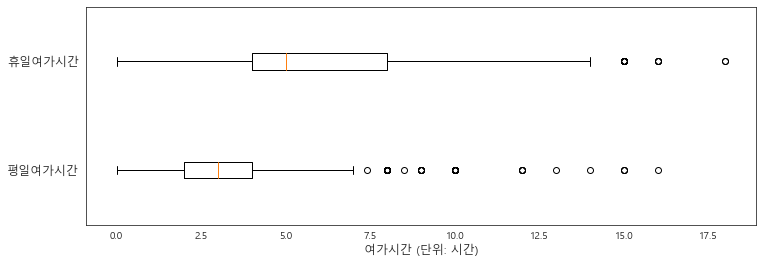

In [495]:
plt.figure(figsize=(12, 4))
bxpd1 = [data7['문13.지난 1년 간 하루 평균 여가시간 - 평일'], data7['문13.지난 1년 간 하루 평균 여가시간 - 휴일']]
plt.xlabel("여가시간 (단위: 시간)", size = 12)
plt.boxplot(bxpd1, vert = False)
plt.yticks([1, 2], ['평일여가시간', '휴일여가시간'], size = 12)

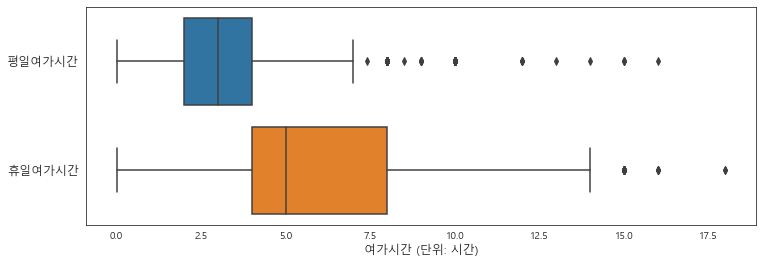

In [496]:
plt.rcParams['font.family'] = 'Malgun Gothic'
bxp=data7.loc[:,['문13.지난 1년 간 하루 평균 여가시간 - 평일','문13.지난 1년 간 하루 평균 여가시간 - 휴일']]
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,4
fig, ax = plt.subplots()
sns.set_style('white')
bxp2 = sns.boxplot(data=bxp, orient="h")
plt.xlabel("여가시간 (단위: 시간)", size = 12)
plt.yticks([0, 1], ['평일여가시간', '휴일여가시간'], size = 12)
plt.rcParams['font.family'] = 'Malgun Gothic'

In [497]:
data7_3 = data7.loc[:,['평일여가충분도', '휴일여가충분도']]
data7_3

,평일여가충분도,휴일여가충분도
73,6,6
79,6,6
89,1,1
90,2,4
149,7,7
...,...,...
10078,4,5
10079,4,5
10082,3,4
10083,3,7


In [498]:
data8 = pd.concat([data7_1, data7_2, data7_3], axis=1)
data8

,평일여가시간_B,평일여가시간_C,평일여가시간_D,평일여가시간_E,휴일여가시간_B,휴일여가시간_C,휴일여가시간_D,휴일여가시간_E,평일여가충분도,휴일여가충분도
73,0,0,0,1,0,0,0,1,6,6
79,0,0,0,1,0,0,0,1,6,6
89,0,0,0,0,0,0,0,0,1,1
90,0,0,0,0,1,0,0,0,2,4
149,1,0,0,0,0,0,0,1,7,7
...,...,...,...,...,...,...,...,...,...,...
10078,0,0,0,0,0,0,1,0,4,5
10079,1,0,0,0,0,1,0,0,4,5
10082,0,0,0,0,0,0,0,0,3,4
10083,0,0,0,0,0,0,1,0,3,7


## 6. 여가공간만족도 자료 처리

In [499]:
data9 = data1.loc[:, ['문18.생활권 내 공공문화 및 여가시설 존재 인식', '문18.생활권 내 공공문화 및 여가시설 이용 충분도', '문18.생활권 내 공공문화 및 여가시설 프로그램 인지도', '문18.생활권 내 공공문화 및 여가시설 프로그램 충분도', '문21.민간 여가산업 만족도- 여가 관련 공간산업', '문21.민간 여가산업 만족도- 여가 관련 용품산업', '문21.민간 여가산업 만족도- 여가 관련 서비스산업']]
data9

,문18.생활권 내 공공문화 및 여가시설 존재 인식,문18.생활권 내 공공문화 및 여가시설 이용 충분도,문18.생활권 내 공공문화 및 여가시설 프로그램 인지도,문18.생활권 내 공공문화 및 여가시설 프로그램 충분도,문21.민간 여가산업 만족도- 여가 관련 공간산업,문21.민간 여가산업 만족도- 여가 관련 용품산업,문21.민간 여가산업 만족도- 여가 관련 서비스산업
73,1,1,1,1,6,6,6
79,5,4,3,4,6,6,5
89,3,2,3,3,4,4,4
90,4,5,4,4,5,4,5
149,2,4,1,4,5,5,4
...,...,...,...,...,...,...,...
10078,4,4,4,4,5,5,5
10079,4,4,3,3,6,6,6
10082,7,3,3,5,7,7,7
10083,4,4,4,4,4,4,4


In [500]:
data9.describe()

,문18.생활권 내 공공문화 및 여가시설 존재 인식,문18.생활권 내 공공문화 및 여가시설 이용 충분도,문18.생활권 내 공공문화 및 여가시설 프로그램 인지도,문18.생활권 내 공공문화 및 여가시설 프로그램 충분도,문21.민간 여가산업 만족도- 여가 관련 공간산업,문21.민간 여가산업 만족도- 여가 관련 용품산업,문21.민간 여가산업 만족도- 여가 관련 서비스산업
count,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000
mean,4.375826,4.236072,3.952156,4.127164,4.848599,4.884797,4.751023
std,1.307947,1.272276,1.424057,1.245221,1.009741,1.109246,1.079938
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000
50%,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000
75%,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000,5.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [501]:
data9['문18.생활권 내 공공문화 및 여가시설 존재 인식'].value_counts().sort_index()

1     83
2    224
3    384
4    929
5    911
6    574
7     72
Name: 문18.생활권 내 공공문화 및 여가시설 존재 인식, dtype: int64

In [502]:
data9['문18.생활권 내 공공문화 및 여가시설 이용 충분도'].value_counts().sort_index()

1      59
2     261
3     453
4    1107
5     781
6     427
7      89
Name: 문18.생활권 내 공공문화 및 여가시설 이용 충분도, dtype: int64

In [503]:
data9['문18.생활권 내 공공문화 및 여가시설 프로그램 인지도'].value_counts().sort_index()

1    178
2    364
3    551
4    932
5    723
6    349
7     80
Name: 문18.생활권 내 공공문화 및 여가시설 프로그램 인지도, dtype: int64

In [504]:
data9['문18.생활권 내 공공문화 및 여가시설 프로그램 충분도'].value_counts().sort_index()

1      73
2     281
3     479
4    1141
5     807
6     331
7      65
Name: 문18.생활권 내 공공문화 및 여가시설 프로그램 충분도, dtype: int64

In [505]:
data9['문21.민간 여가산업 만족도- 여가 관련 공간산업'].value_counts().sort_index()

1       5
2      57
3     153
4     939
5    1174
6     743
7     106
Name: 문21.민간 여가산업 만족도- 여가 관련 공간산업, dtype: int64

In [506]:
data9['문21.민간 여가산업 만족도- 여가 관련 용품산업'].value_counts().sort_index()

1      11
2      58
3     220
4     867
5    1035
6     813
7     173
Name: 문21.민간 여가산업 만족도- 여가 관련 용품산업, dtype: int64

In [507]:
data9['문21.민간 여가산업 만족도- 여가 관련 서비스산업'].value_counts().sort_index()

1      16
2      55
3     244
4     989
5    1093
6     645
7     135
Name: 문21.민간 여가산업 만족도- 여가 관련 서비스산업, dtype: int64

#### 6-A. 결측값 확인

In [508]:
data9.isnull().any()

문18.생활권 내 공공문화 및 여가시설 존재 인식       False
문18.생활권 내 공공문화 및 여가시설 이용 충분도      False
문18.생활권 내 공공문화 및 여가시설 프로그램 인지도    False
문18.생활권 내 공공문화 및 여가시설 프로그램 충분도    False
문21.민간 여가산업 만족도- 여가 관련 공간산업       False
문21.민간 여가산업 만족도- 여가 관련 용품산업       False
문21.민간 여가산업 만족도- 여가 관련 서비스산업      False
dtype: bool

#### 6-B. 크론바하-알파값 확인 (내적일관성)

In [509]:
data10 = data9.iloc[:,0:4] #공공여가시설인식및충분도
data11 = data9.iloc[:,4:7] #민간여가시설만족도
import pingouin
print(pingouin.cronbach_alpha(data=data10)) #공공여가시설인식및충분도
print(pingouin.cronbach_alpha(data=data11)) #민간여가시설만족도

(0.9069089226467271, array([0.902, 0.912]))
(0.864786597175278, array([0.856, 0.873]))


#### 6-C. 변수 리코딩 (공공여가시설충분도, 민간여가시설만족도)

In [510]:
data12 = pd.DataFrame() #공공여가시설만족도평균 (2,4번 설문 문항만 사용)
data13 = pd.DataFrame() #민간여가시설만족도평균

data12['공공여가시설충분도'] = (data9['문18.생활권 내 공공문화 및 여가시설 이용 충분도'] + data9['문18.생활권 내 공공문화 및 여가시설 프로그램 충분도'])/2 #공공여가시설충분도
data13['민간여가산업만족도'] = (data11['문21.민간 여가산업 만족도- 여가 관련 공간산업'] + data11['문21.민간 여가산업 만족도- 여가 관련 용품산업'] + data11['문21.민간 여가산업 만족도- 여가 관련 서비스산업'])/3 #민간여가시설만족도

In [511]:
data12['공공여가시설충분도'].describe()

count    3177.000000
mean        4.181618
std         1.187904
min         1.000000
25%         3.500000
50%         4.000000
75%         5.000000
max         7.000000
Name: 공공여가시설충분도, dtype: float64

## 7. 일과여가의균형 자료 처리

In [512]:
data14 = data1.loc[:, ['문28.일(학업)과 여가의 균형']]

In [513]:
data14

,문28.일(학업)과 여가의 균형
73,4
79,5
89,1
90,5
149,4
...,...
10078,3
10079,4
10082,6
10083,2


In [514]:
data14.describe()

,문28.일(학업)과 여가의 균형
count,3177.000000
mean,3.802014
std,1.137088
min,1.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,7.000000


In [515]:
data14.value_counts().sort_index()

문28.일(학업)과 여가의 균형
1                      81
2                     369
3                     607
4                    1378
5                     538
6                     191
7                      13
dtype: int64

#### 7-A. 결측값 확인

In [516]:
data14.isnull().any()

문28.일(학업)과 여가의 균형    False
dtype: bool

#### 7-B. 변수 리코딩

In [517]:
data14.loc[data14['문28.일(학업)과 여가의 균형']== 1, '일과여가의균형'] = 'A' #1.2.3 → A: 일에 집중하는 집단
data14.loc[data14['문28.일(학업)과 여가의 균형']== 2, '일과여가의균형'] = 'A' 
data14.loc[data14['문28.일(학업)과 여가의 균형']== 3, '일과여가의균형'] = 'A'

data14.loc[data14['문28.일(학업)과 여가의 균형']== 4, '일과여가의균형'] = 'B' #4 → B: 균형을 이루는 집단

data14.loc[data14['문28.일(학업)과 여가의 균형']== 5, '일과여가의균형'] = 'C' #5,6,7 → C: 여가에 집중하는 집단
data14.loc[data14['문28.일(학업)과 여가의 균형']== 6, '일과여가의균형'] = 'C'
data14.loc[data14['문28.일(학업)과 여가의 균형']== 7, '일과여가의균형'] = 'C'


In [518]:
data14

,문28.일(학업)과 여가의 균형,일과여가의균형
73,4,B
79,5,C
89,1,A
90,5,C
149,4,B
...,...,...
10078,3,A
10079,4,B
10082,6,C
10083,2,A


In [567]:
data14['일과여가의균형'].value_counts()

B    1378
A    1057
C     742
Name: 일과여가의균형, dtype: int64

In [568]:
data14['일과여가의균형'].value_counts()/3177

B    0.433743
A    0.332704
C    0.233554
Name: 일과여가의균형, dtype: float64

#### 7-C. 그래프

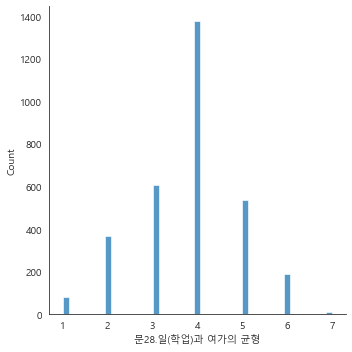

In [519]:
sns.displot(data14['문28.일(학업)과 여가의 균형'])

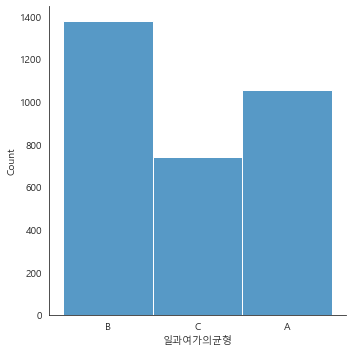

In [520]:
sns.displot(data14['일과여가의균형'])

#### 7-D. Categorical 변수로 원-핫 인코딩 처리 (더미변수화)

In [521]:
data15 = pd.get_dummies(data14['일과여가의균형'], drop_first=True, prefix='일과여가의균형') 

In [522]:
data15

,일과여가의균형_B,일과여가의균형_C
73,1,0
79,0,1
89,0,0
90,0,1
149,1,0
...,...,...
10078,0,0
10079,1,0
10082,0,1
10083,0,0


## 8. 여가인식 자료 처리

In [523]:
data16 = pd.DataFrame()

data16['여가인식:삶의필수요건'] = data1['문31.여가인식 - 여가활동이 삶의 필수적인 요건이다']
data16['여가인식:삶의영향력'] = data1['문32.여가인식 - 여가활동이 삶의 긍정적 영향을 끼치는 지 여부']

In [524]:
data16

,여가인식:삶의필수요건,여가인식:삶의영향력
73,5,5
79,6,6
89,5,6
90,5,6
149,6,6
...,...,...
10078,5,5
10079,7,7
10082,7,7
10083,6,7


In [525]:
data16.describe()

,여가인식:삶의필수요건,여가인식:삶의영향력
count,3177.000000,3177.000000
mean,5.696254,5.779981
std,0.924731,0.860409
min,1.000000,1.000000
25%,5.000000,5.000000
50%,6.000000,6.000000
75%,6.000000,6.000000
max,7.000000,7.000000


In [526]:
data16['여가인식:삶의필수요건'].value_counts().sort_index()

1       2
2       7
3      20
4     248
5    1023
6    1225
7     652
Name: 여가인식:삶의필수요건, dtype: int64

In [527]:
data16['여가인식:삶의영향력'].value_counts().sort_index()

1       1
2       1
3       6
4     199
5     944
6    1356
7     670
Name: 여가인식:삶의영향력, dtype: int64

#### 8-A. 결측값 확인

In [528]:
data16.isnull().any()

여가인식:삶의필수요건    False
여가인식:삶의영향력     False
dtype: bool

#### 8-B. 그래프

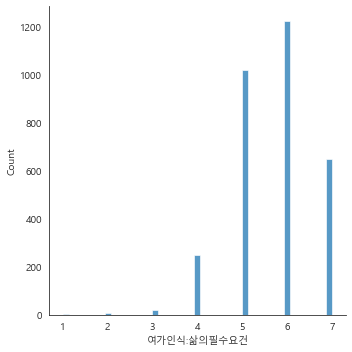

In [529]:
sns.displot(data16['여가인식:삶의필수요건'])

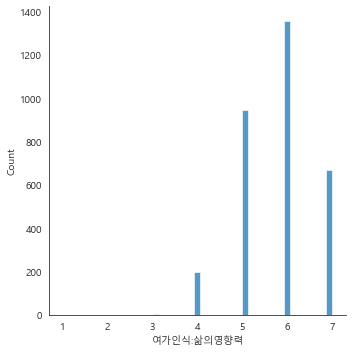

In [530]:
sns.displot(data16['여가인식:삶의영향력'])

## 9. 인구사회학적 요인 (성별, 교육수준, 배우자유무)

In [531]:
data17 = data1.loc[:, ['문43.응답자 성별', '문39.본인의 교육정도 - 최종학력', '문40.혼인상태']]

In [532]:
data17

,문43.응답자 성별,문39.본인의 교육정도 - 최종학력,문40.혼인상태
73,2,6,1
79,1,4,1
89,2,5,2
90,2,5,2
149,1,4,2
...,...,...,...
10078,1,5,1
10079,2,5,1
10082,1,5,1
10083,1,4,1


#### 9-A. 결측값 확인

In [533]:
pd.value_counts(data17['문43.응답자 성별']).sort_index()

1    1661
2    1516
Name: 문43.응답자 성별, dtype: int64

In [534]:
pd.value_counts(data17['문39.본인의 교육정도 - 최종학력']).sort_index()

1       1
2       2
3       5
4     593
5     695
6    1817
7      53
8      11
Name: 문39.본인의 교육정도 - 최종학력, dtype: int64

In [535]:
pd.value_counts(data17['문40.혼인상태']).sort_index()

1    1967
2    1184
3       2
4      24
Name: 문40.혼인상태, dtype: int64

In [536]:
data17.describe()

,문43.응답자 성별,문39.본인의 교육정도 - 최종학력,문40.혼인상태
count,3177.000000,3177.000000,3177.000000
mean,1.477180,5.422726,1.396601
std,0.499558,0.833659,0.534774
min,1.000000,1.000000,1.000000
25%,1.000000,5.000000,1.000000
50%,1.000000,6.000000,1.000000
75%,2.000000,6.000000,2.000000
max,2.000000,8.000000,4.000000


#### 9-B. 변수 리코딩

In [537]:
data17.loc[data17['문43.응답자 성별']== 1, '성별 '] = "M" # 성별 1 = 남성 
data17.loc[data17['문43.응답자 성별']== 2, '성별 '] = "W" # 성별 2 = 여성

data17.loc[data17['문39.본인의 교육정도 - 최종학력']== 1, '교육수준'] = "A" # 무학
data17.loc[data17['문39.본인의 교육정도 - 최종학력']== 2, '교육수준'] = "A" # 초등학교
data17.loc[data17['문39.본인의 교육정도 - 최종학력']== 3, '교육수준'] = "A" # 중학교
data17.loc[data17['문39.본인의 교육정도 - 최종학력']== 4, '교육수준'] = "A" # 고등학교
data17.loc[data17['문39.본인의 교육정도 - 최종학력']== 5, '교육수준'] = "B" # 2,3년제 대학교
data17.loc[data17['문39.본인의 교육정도 - 최종학력']== 6, '교육수준'] = "B" # 4년제 대학교
data17.loc[data17['문39.본인의 교육정도 - 최종학력']== 7, '교육수준'] = "B" # 대학원 석사
data17.loc[data17['문39.본인의 교육정도 - 최종학력']== 8, '교육수준'] = "B" # 대학원 박사
# 고등학교 이하 = 1, 대학교 이상 = 2로 처리.


data17.loc[data17['문40.혼인상태']== 1, '배우자유무'] = "N" # 배우자 없음
data17.loc[data17['문40.혼인상태']== 2, '배우자유무'] = "Y" # 배우자 있음
data17.loc[data17['문40.혼인상태']== 3, '배우자유무'] = "N" # 사별한 경우, 배우자 없음으로 처리.
data17.loc[data17['문40.혼인상태']== 4, '배우자유무'] = "N" # 이론한 경우, 배우자 없음으로 처리.

In [538]:
data18 = data17.iloc[:,3:6]
data18

,성별,교육수준,배우자유무
73,W,B,N
79,M,A,N
89,W,B,Y
90,W,B,Y
149,M,A,Y
...,...,...,...
10078,M,B,N
10079,W,B,N
10082,M,B,N
10083,M,A,N


In [576]:
data18['성별 '].value_counts()

M    1661
W    1516
Name: 성별 , dtype: int64

In [579]:
data18['성별 '].value_counts()/3177

M    0.52282
W    0.47718
Name: 성별 , dtype: float64

In [577]:
data18['교육수준'].value_counts()

B    2576
A     601
Name: 교육수준, dtype: int64

In [580]:
data18['교육수준'].value_counts()/3177

B    0.810828
A    0.189172
Name: 교육수준, dtype: float64

In [578]:
data18['배우자유무'].value_counts()

N    1993
Y    1184
Name: 배우자유무, dtype: int64

In [581]:
data18['배우자유무'].value_counts()/3177

N    0.627321
Y    0.372679
Name: 배우자유무, dtype: float64

## 10. 주평균근무시간 자료 처리

In [539]:
data19 = data1.loc[:, ['문47.주당 평균 근무 시간']] #NAN으로 응답한 사람은 일하지 않는 사람들임
data19

,문47.주당 평균 근무 시간
73,NaN
79,20.0
89,NaN
90,40.0
149,NaN
...,...
10078,40.0
10079,40.0
10082,NaN
10083,52.0


#### 10-A. 결측값 처리

In [540]:
data19['문47.주당 평균 근무 시간'].replace(np.nan, 0, inplace=True) #일하지 않는 사람들 = 0시간으로 리코딩
data19

,문47.주당 평균 근무 시간
73,0.0
79,20.0
89,0.0
90,40.0
149,0.0
...,...
10078,40.0
10079,40.0
10082,0.0
10083,52.0


In [541]:
data19.value_counts().sort_index()

문47.주당 평균 근무 시간
0.0                1212
2.0                   1
4.0                   3
5.0                   4
6.0                   2
7.0                   1
8.0                   5
10.0                  7
11.0                  2
12.0                  4
13.0                  1
14.0                  3
15.0                  3
16.0                  2
18.0                  2
20.0                 28
21.0                  1
22.0                  1
24.0                  6
25.0                  7
28.0                  4
30.0                 44
32.0                  3
33.0                  1
34.0                  1
35.0                 16
36.0                  3
37.0                  1
38.0                  2
40.0                901
42.0                 13
43.0                  1
44.0                 12
45.0                151
46.0                  3
48.0                135
49.0                  2
50.0                175
51.0                  1
52.0                 71
53.0                  2


In [542]:
data19.describe()

,문47.주당 평균 근무 시간
count,3177.000000
mean,27.628266
std,23.283720
min,0.000000
25%,0.000000
50%,40.000000
75%,45.000000
max,100.000000


#### 10-B. 변수 리코딩

#### 우리나라 일주일 기준으로 법정근로시간은 기본 40시간, 최대 52시간임.

일을 하지 않는 경우 = A

0시간 이상, 40시간 이하의 경우 = B

40시간 초과, 52시간 이하의 경우 = C

52시간 초과의 경우 = D로 리코딩


In [543]:
data19.loc[data19['문47.주당 평균 근무 시간'] == 0, '주평균근무시간'] = "A"
data19.loc[data19['문47.주당 평균 근무 시간'] > 0, '주평균근무시간'] = "B"
data19.loc[data19['문47.주당 평균 근무 시간'] == 40, '주평균근무시간'] = "B"
data19.loc[data19['문47.주당 평균 근무 시간'] > 40, '주평균근무시간'] = "C"
data19.loc[data19['문47.주당 평균 근무 시간'] > 52, '주평균근무시간'] = "D"

In [544]:
data19

,문47.주당 평균 근무 시간,주평균근무시간
73,0.0,A
79,20.0,B
89,0.0,A
90,40.0,B
149,0.0,A
...,...,...
10078,40.0,B
10079,40.0,B
10082,0.0,A
10083,52.0,C


In [569]:
data19['주평균근무시간'].value_counts()

A    1212
B    1059
C     564
D     342
Name: 주평균근무시간, dtype: int64

In [570]:
data19['주평균근무시간'].value_counts()/3177

A    0.381492
B    0.333333
C    0.177526
D    0.107649
Name: 주평균근무시간, dtype: float64

#### 10-C. 그래프

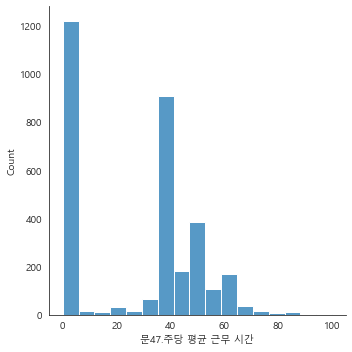

In [545]:
sns.displot(data19['문47.주당 평균 근무 시간'])

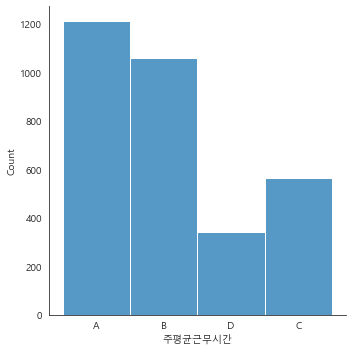

In [546]:
sns.displot(data19['주평균근무시간'])

In [547]:
data20 = data19.iloc[:, 1:]
data20

,주평균근무시간
73,A
79,B
89,A
90,B
149,A
...,...
10078,B
10079,B
10082,A
10083,C


In [548]:
data20 = pd.get_dummies(data20['주평균근무시간'], drop_first=True, prefix='주평균근무시간') 
data20

,주평균근무시간_B,주평균근무시간_C,주평균근무시간_D
73,0,0,0
79,1,0,0
89,0,0,0
90,1,0,0
149,0,0,0
...,...,...,...
10078,1,0,0
10079,1,0,0
10082,0,0,0
10083,0,1,0


## 11. 여가생활만족도 변수처리 (결과변수)

In [549]:
data21 = data1.loc[:, ['문30.전반적 여가생활 만족도']]
data21

,문30.전반적 여가생활 만족도
73,5
79,5
89,1
90,4
149,6
...,...
10078,4
10079,5
10082,7
10083,4


In [550]:
data21.value_counts().sort_index()

문30.전반적 여가생활 만족도
1                     30
2                    131
3                    319
4                    918
5                   1134
6                    562
7                     83
dtype: int64

In [551]:
data21.describe()

,문30.전반적 여가생활 만족도
count,3177.000000
mean,4.577904
std,1.147356
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,7.000000


#### 11-A. 결측값 확인

In [552]:
data21['문30.전반적 여가생활 만족도'].isnull().any()

False

#### 11-B. 변수 리코딩 (이진분류)

1,2,3,4로 응답한 사람 → 불만족 (A)

5,6,7로 응답한 사람 →만족 (B)

In [553]:
data21.loc[data21['문30.전반적 여가생활 만족도']== 1, '여가생활만족도'] = "A"
data21.loc[data21['문30.전반적 여가생활 만족도']== 2, '여가생활만족도'] = "A"
data21.loc[data21['문30.전반적 여가생활 만족도']== 3, '여가생활만족도'] = "A"
data21.loc[data21['문30.전반적 여가생활 만족도']== 4, '여가생활만족도'] = "A"

data21.loc[data21['문30.전반적 여가생활 만족도']== 5, '여가생활만족도'] = "B"
data21.loc[data21['문30.전반적 여가생활 만족도']== 6, '여가생활만족도'] = "B"
data21.loc[data21['문30.전반적 여가생활 만족도']== 7, '여가생활만족도'] = "B"


In [554]:
data21

,문30.전반적 여가생활 만족도,여가생활만족도
73,5,B
79,5,B
89,1,A
90,4,A
149,6,B
...,...,...
10078,4,A
10079,5,B
10082,7,B
10083,4,A


In [583]:
data21['여가생활만족도'].value_counts()

B    1779
A    1398
Name: 여가생활만족도, dtype: int64

In [584]:
data21['여가생활만족도'].value_counts()/3177

B    0.559962
A    0.440038
Name: 여가생활만족도, dtype: float64

#### 11-C. 그래프

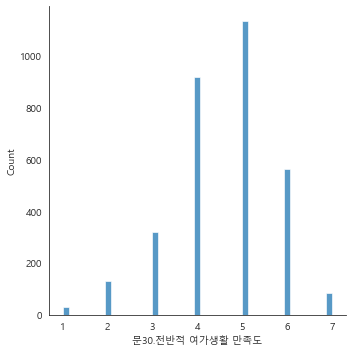

In [555]:
sns.displot(data21['문30.전반적 여가생활 만족도'])

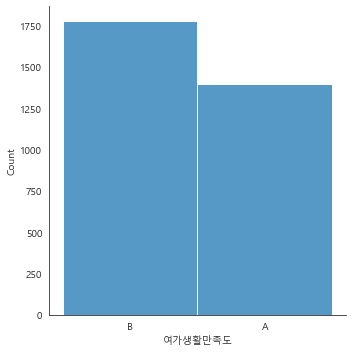

In [556]:
sns.displot(data21['여가생활만족도'])

In [557]:
data22 = data21.iloc[:, 1:]
data22

,여가생활만족도
73,B
79,B
89,A
90,A
149,B
...,...
10078,A
10079,B
10082,B
10083,A


## 12. 자료 정리

#### 12-A. 변수 합치기

In [558]:
data23 = pd.concat([data4, data6, data8, data12, data13, data15, data16, data18, data20, data22], axis=1)
pd.set_option('display.max_columns', 100)
data23

,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용_B,여가비용_C,여가비용_D,평일여가시간_B,평일여가시간_C,평일여가시간_D,평일여가시간_E,휴일여가시간_B,휴일여가시간_C,휴일여가시간_D,휴일여가시간_E,평일여가충분도,휴일여가충분도,공공여가시설충분도,민간여가산업만족도,일과여가의균형_B,일과여가의균형_C,여가인식:삶의필수요건,여가인식:삶의영향력,성별,교육수준,배우자유무,주평균근무시간_B,주평균근무시간_C,주평균근무시간_D,여가생활만족도
73,0.000000,0.000000,0.000000,0.272727,0.555556,0.250,1,0,0,0,0,0,1,0,0,0,1,6,6,1.0,6.000000,1,0,5,5,W,B,N,0,0,0,B
79,0.000000,0.045455,0.363636,0.227273,0.444444,0.375,0,0,0,0,0,0,1,0,0,0,1,6,6,4.0,5.666667,0,1,6,6,M,A,N,1,0,0,B
89,0.000000,0.000000,0.545455,0.318182,0.666667,0.375,1,0,0,0,0,0,0,0,0,0,0,1,1,2.5,4.000000,0,0,5,6,W,B,Y,0,0,0,A
90,0.000000,0.045455,0.454545,0.318182,0.777778,0.375,0,1,0,0,0,0,0,1,0,0,0,2,4,4.5,4.666667,0,1,5,6,W,B,Y,1,0,0,A
149,0.000000,0.045455,0.000000,0.227273,0.444444,0.250,0,0,1,1,0,0,0,0,0,0,1,7,7,4.0,4.666667,1,0,6,6,M,A,Y,0,0,0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10078,0.066667,0.090909,0.000000,0.136364,0.555556,0.625,1,0,0,0,0,0,0,0,0,1,0,4,5,4.0,5.000000,0,0,5,5,M,B,N,1,0,0,A
10079,0.133333,0.090909,0.090909,0.090909,0.555556,0.125,0,0,1,1,0,0,0,0,1,0,0,4,5,3.5,6.000000,1,0,7,7,W,B,N,1,0,0,B
10082,0.200000,0.409091,0.363636,0.363636,0.444444,0.500,0,1,0,0,0,0,0,0,0,0,0,3,4,4.0,7.000000,0,1,7,7,M,B,N,0,0,0,B
10083,0.066667,0.136364,0.000000,0.272727,0.777778,0.625,1,0,0,0,0,0,0,0,0,1,0,3,7,4.0,4.000000,0,0,6,7,M,A,N,0,1,0,A


In [559]:
data24=data23

In [560]:
data24.describe()

,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용_B,여가비용_C,여가비용_D,평일여가시간_B,평일여가시간_C,평일여가시간_D,평일여가시간_E,휴일여가시간_B,휴일여가시간_C,휴일여가시간_D,휴일여가시간_E,평일여가충분도,휴일여가충분도,공공여가시설충분도,민간여가산업만족도,일과여가의균형_B,일과여가의균형_C,여가인식:삶의필수요건,여가인식:삶의영향력,주평균근무시간_B,주평균근무시간_C,주평균근무시간_D
count,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000
mean,0.114699,0.104401,0.265488,0.265545,0.584199,0.400142,0.240793,0.265345,0.232924,0.286749,0.070822,0.020145,0.016368,0.314133,0.180988,0.136922,0.144161,4.385899,4.926660,4.181618,4.828140,0.433743,0.233554,5.696254,5.779981,0.333333,0.177526,0.107649
std,0.094324,0.093905,0.195839,0.123134,0.201777,0.145286,0.427632,0.441586,0.422761,0.452314,0.256567,0.140518,0.126905,0.464243,0.385069,0.343819,0.351308,1.350773,1.329276,1.187904,0.946762,0.495669,0.423158,0.924731,0.860409,0.471479,0.382173,0.309985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.066667,0.045455,0.090909,0.181818,0.444444,0.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,3.500000,4.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000
50%,0.066667,0.090909,0.272727,0.272727,0.555556,0.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000,4.000000,5.000000,0.000000,0.000000,6.000000,6.000000,0.000000,0.000000,0.000000
75%,0.133333,0.136364,0.363636,0.318182,0.777778,0.500000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,6.000000,5.000000,5.333333,1.000000,0.000000,6.000000,6.000000,1.000000,0.000000,0.000000
max,0.733333,0.772727,1.000000,0.818182,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,7.000000,7.000000,7.000000,1.000000,1.000000,7.000000,7.000000,1.000000,1.000000,1.000000


#### 12-B. 상관계수 행렬

In [561]:
from scipy.stats import kendalltau, pearsonr, spearmanr
def pearsonr_co(x,y):
        return pearsonr(x,y)[0]
def pearsonr_pval(x,y):
        return pearsonr(x,y)[1]

In [562]:
data25 = data24.corr(method=pearsonr_co)
data25

,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용_B,여가비용_C,여가비용_D,평일여가시간_B,평일여가시간_C,평일여가시간_D,평일여가시간_E,휴일여가시간_B,휴일여가시간_C,휴일여가시간_D,휴일여가시간_E,평일여가충분도,휴일여가충분도,공공여가시설충분도,민간여가산업만족도,일과여가의균형_B,일과여가의균형_C,여가인식:삶의필수요건,여가인식:삶의영향력,주평균근무시간_B,주평균근무시간_C,주평균근무시간_D
문화예술,1.000000,0.379559,0.360352,0.338021,0.174370,0.176266,0.011357,0.091531,0.053606,0.003263,-0.023515,0.010910,-0.025367,-0.007214,-0.003631,-0.019685,-0.008225,0.022353,0.026263,0.048104,0.067865,0.037787,0.040177,0.141570,0.152243,0.055224,-0.028158,-0.065622
스포츠,0.379559,1.000000,0.307196,0.406262,0.196378,0.246171,-0.027111,0.146608,0.068623,0.016712,-0.004030,0.047727,-0.019737,-0.011893,0.049208,0.012360,0.015208,0.018628,0.067206,0.014464,0.075778,0.065487,0.025485,0.138679,0.155077,0.037067,0.030146,-0.032210
관광,0.360352,0.307196,1.000000,0.350706,0.345218,0.368314,-0.038307,0.105298,0.077764,-0.027936,0.052933,0.076032,-0.045907,-0.015277,0.006753,0.030455,0.022663,-0.069507,-0.068013,-0.011695,0.070683,0.020269,0.003139,0.159661,0.146487,0.037924,0.048920,-0.047040
취미오락,0.338021,0.406262,0.350706,1.000000,0.503673,0.432804,-0.031562,0.105864,0.044244,0.101232,0.018824,0.031525,0.013021,-0.015349,0.056401,0.054337,0.064307,0.080344,0.065595,-0.011871,-0.004740,0.035347,0.034676,0.129150,0.150562,-0.009779,-0.020341,-0.021733
휴식,0.174370,0.196378,0.345218,0.503673,1.000000,0.472475,-0.019141,0.123949,0.014041,0.073657,0.041896,0.022829,-0.018315,-0.047160,0.072389,0.034221,0.046852,0.007310,-0.009383,-0.019083,0.010577,0.043992,-0.039859,0.053393,0.077622,0.016916,-0.040556,-0.004007
사회기타,0.176266,0.246171,0.368314,0.432804,0.472475,1.000000,-0.030323,0.100882,0.014842,0.085506,0.050412,0.038803,-0.052212,-0.054695,0.070596,0.040583,0.042320,-0.013154,-0.019796,-0.051095,-0.020367,-0.007740,-0.010397,0.068284,0.069453,0.033900,0.001815,0.001933
여가비용_B,0.011357,-0.027111,-0.038307,-0.031562,-0.019141,-0.030323,1.000000,-0.338459,-0.310335,-0.073843,-0.032080,-0.023112,-0.008826,0.050258,-0.016169,-0.070124,-0.078140,-0.012653,-0.030961,0.017704,0.002960,-0.014577,0.033636,-0.078535,-0.069902,-0.031233,-0.015042,-0.000834
여가비용_C,0.091531,0.146608,0.105298,0.105864,0.123949,0.100882,-0.338459,1.000000,-0.331170,0.017768,0.028618,0.066057,-0.015720,-0.042719,0.073006,0.032300,-0.003101,-0.007027,0.008489,-0.029774,0.022502,0.030719,-0.033508,0.056332,0.074149,0.009074,0.013705,-0.040823
여가비용_D,0.053606,0.068623,0.077764,0.044244,0.014041,0.014842,-0.310335,-0.331170,1.000000,0.090243,0.068484,-0.010108,-0.000658,-0.077741,0.004001,0.096781,0.140600,0.031117,0.074670,0.010723,0.069102,0.021082,-0.008500,0.164117,0.154782,0.038438,0.059693,0.068090
평일여가시간_B,0.003263,0.016712,-0.027936,0.101232,0.073657,0.085506,-0.073843,0.017768,0.090243,1.000000,-0.175050,-0.090914,-0.081791,-0.096228,0.144837,0.203000,0.132104,0.196576,0.160671,0.056576,0.052128,0.072832,0.016833,0.012581,-0.015827,-0.029037,-0.006787,-0.015872


In [563]:
data26 = data24.corr(method=pearsonr_pval)
data26

,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용_B,여가비용_C,여가비용_D,평일여가시간_B,평일여가시간_C,평일여가시간_D,평일여가시간_E,휴일여가시간_B,휴일여가시간_C,휴일여가시간_D,휴일여가시간_E,평일여가충분도,휴일여가충분도,공공여가시설충분도,민간여가산업만족도,일과여가의균형_B,일과여가의균형_C,여가인식:삶의필수요건,여가인식:삶의영향력,주평균근무시간_B,주평균근무시간_C,주평균근무시간_D
문화예술,1.000000e+00,2.092905e-109,4.969821e-98,9.360472e-86,4.144478e-23,1.380930e-23,5.222213e-01,2.366534e-07,2.506991e-03,8.541212e-01,1.851459e-01,5.387599e-01,1.528734e-01,6.843876e-01,8.379131e-01,2.673278e-01,6.430431e-01,2.078212e-01,1.388785e-01,6.690374e-03,1.291348e-04,3.319130e-02,2.353913e-02,1.085092e-15,6.235324e-18,1.846555e-03,1.125526e-01,2.144877e-04
스포츠,2.092905e-109,1.000000e+00,2.098747e-70,1.508684e-126,5.500998e-29,4.548227e-45,1.265702e-01,9.965819e-17,1.083933e-04,3.463778e-01,8.203619e-01,7.132277e-03,2.660642e-01,5.027820e-01,5.533583e-03,4.861658e-01,3.914835e-01,2.938816e-01,1.501258e-04,4.150874e-01,1.905720e-05,2.210141e-04,1.509641e-01,4.109623e-15,1.486226e-18,3.669387e-02,8.933933e-02,6.948073e-02
관광,4.969821e-98,2.098747e-70,1.000000e+00,1.322156e-92,1.330598e-89,1.187709e-102,3.083962e-02,2.692591e-09,1.143475e-05,1.154175e-01,2.840605e-03,1.786402e-05,9.657046e-03,3.893441e-01,7.036039e-01,8.610259e-02,2.015800e-01,8.819636e-05,1.248150e-04,5.099262e-01,6.678960e-05,2.534076e-01,8.596010e-01,1.379789e-19,1.056389e-16,3.255798e-02,5.816824e-03,8.006074e-03
취미오락,9.360472e-86,1.508684e-126,1.322156e-92,1.000000e+00,5.144032e-204,3.251730e-145,7.528492e-02,2.210985e-09,1.262919e-02,1.075443e-08,2.888276e-01,7.562439e-02,4.631587e-01,3.871264e-01,1.471090e-03,2.185562e-03,2.867542e-04,5.783874e-06,2.157743e-04,5.035688e-01,7.894333e-01,4.635235e-02,5.066331e-02,2.726080e-13,1.441855e-17,5.816514e-01,2.517229e-01,2.207212e-01
휴식,4.144478e-23,5.500998e-29,1.330598e-89,5.144032e-204,1.000000e+00,2.055508e-176,2.807846e-01,2.372171e-12,4.288739e-01,3.243356e-05,1.819640e-02,1.983049e-01,3.020802e-01,7.846013e-03,4.427408e-05,5.376903e-02,8.260507e-03,6.804393e-01,5.970404e-01,2.822432e-01,5.512231e-01,1.314445e-02,2.466107e-02,2.608753e-03,1.186707e-05,3.405036e-01,2.225637e-02,8.213752e-01
사회기타,1.380930e-23,4.548227e-45,1.187709e-102,3.251730e-145,2.055508e-176,1.000000e+00,8.747509e-02,1.208799e-08,4.030101e-01,1.389663e-06,4.480891e-03,2.873584e-02,3.242647e-03,2.042708e-03,6.818605e-05,2.216666e-02,1.705757e-02,4.585946e-01,2.646554e-01,3.967820e-03,2.511070e-01,6.627771e-01,5.579993e-01,1.172406e-04,8.932086e-05,5.606186e-02,9.185367e-01,9.132514e-01
여가비용_B,5.222213e-01,1.265702e-01,3.083962e-02,7.528492e-02,2.807846e-01,8.747509e-02,1.000000e+00,5.497414e-86,6.929800e-72,3.097497e-05,7.061829e-02,1.927966e-01,6.189788e-01,4.604783e-03,3.622649e-01,7.626908e-05,1.036695e-05,4.758930e-01,8.101665e-02,3.184997e-01,8.675371e-01,4.114541e-01,5.799875e-02,9.348709e-06,8.037246e-05,7.837494e-02,3.966995e-01,9.625050e-01
여가비용_C,2.366534e-07,9.965819e-17,2.692591e-09,2.210985e-09,2.372171e-12,1.208799e-08,5.497414e-86,1.000000e+00,3.460645e-82,3.167548e-01,1.068046e-01,1.946402e-04,3.757354e-01,1.603978e-02,3.807861e-05,6.870523e-02,8.613015e-01,6.921513e-01,6.324475e-01,9.336199e-02,2.048071e-01,8.341157e-02,5.896703e-02,1.491093e-03,2.870382e-05,6.091706e-01,4.399962e-01,2.138806e-02
여가비용_D,2.506991e-03,1.083933e-04,1.143475e-05,1.262919e-02,4.288739e-01,4.030101e-01,6.929800e-72,3.460645e-82,1.000000e+00,3.488683e-07,1.119485e-04,5.689877e-01,9.704432e-01,1.150544e-05,8.216472e-01,4.610249e-08,1.701507e-15,7.949679e-02,2.520089e-05,5.457300e-01,9.696216e-05,2.348582e-01,6.319751e-01,1.278550e-20,1.727813e-18,3.027158e-02,7.619504e-04,1.226193e-04
평일여가시간_B,8.541212e-01,3.463778e-01,1.154175e-01,1.075443e-08,3.243356e-05,1.389663e-06,3.097497e-05,3.167548e-01,3.488683e-07,1.000000e+00,2.798580e-23,2.852210e-07,3.910838e-06,5.499856e-08,2.329133e-16,6.716165e-31,7.668927e-14,4.833482e-29,8.096391e-20,1.421732e-03,3.292287e-03,3.973135e-05,3.428815e-01,4.784169e-01,3.724975e-01,1.017656e-01,7.021616e-01,3.711436e-01


#### 상삼각행렬 부분은 p-value
#### 하삼각행렬 부분은 상관계수

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 [Text(0.5, 0, '문화예술'),
  Text(1.5, 0, '스포츠'),
  Text(2.5, 0, '관광'),
  Text(3.5, 0, '취미오락'),
  Text(4.5, 0, '휴식'),
  Text(5.5, 0, '사회기타'),
  Text(6.5, 0, '여가비용_B'),
  Text(7.5, 0, '여가비용_C'),
  Text(8.5, 0, '여가비용_D'),
  Text(9.5, 0, '평일여가시간_B'),
  Text(10.5, 0, '평일여가시간_C'),
  Text(11.5, 0, '평일여가시간_D'),
  Text(12.5, 0, '평일여가시간_E'),
  Text(13.5, 0, '휴일여가시간_B'),
  Text(14.5, 0, '휴일여가시간_C'),
  Text(15.5, 0, '휴일여가시간_D'),
  Text(16.5, 0, '휴일여가시간_E'),
  Text(17.5, 0, '평일여가충분도'),
  Text(18.5, 0, '휴일여가충분도'),
  Text(19.5, 0, '공공여가시설충분도'),
  Text(20.5, 0, '민간여가산업만족도'),
  Text(21.5, 0, '일과여가의균형_B'),
  Text(22.5, 0, '일과여가의균형_C'),
  Text(23.5, 0, '여가인식:삶의필수요건'),
  Text(24.5, 0, '여가인식:삶의영향력'),
  Text(25.5, 0, '주평균근무시간_B'),
  Text(26.5, 0, '주평균근무시간_C'),
  Text(27.5, 0, '주평균근무시간_D')])

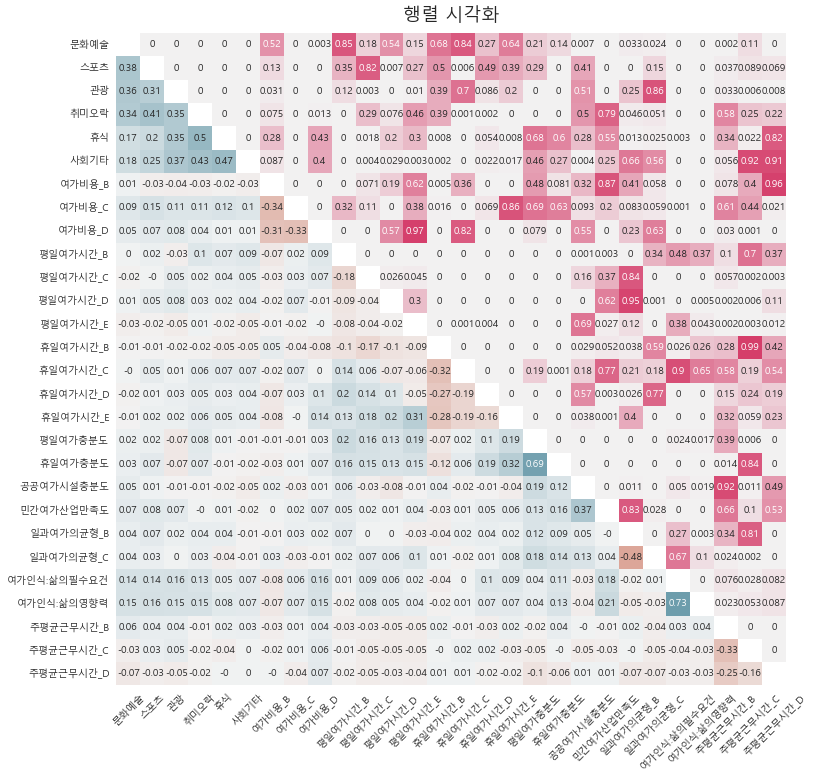

In [564]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc("font", family = "Malgun Gothic")
plt.rc("axes", unicode_minus = False)
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(12, 12))

data27 = round(data25, 2)
data28 = round(data26, 3)

mask = np.triu(np.ones_like(data27.corr(), dtype=bool))
mask2 = np.tril(np.ones_like(data28.corr(), dtype=bool))

heat01 = sns.heatmap(data27, vmin=-1, vmax=1,  cmap=sns.diverging_palette(20, 220, n=200), mask=mask,  annot=True, cbar = False)
heat02 = sns.heatmap(data28, vmin=-1, vmax=1,  cmap=sns.diverging_palette(520, 720, n=200), mask=mask2, annot=True, cbar = False)


ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=60,
    horizontalalignment='center'
)
plt.title('행렬 시각화', fontdict={'fontsize':18}, pad=12)
plt.xticks(rotation=45)

#상삼각행렬 부분은 p-value
#하삼각행렬 부분은 상관계수

In [586]:
#data24.to_csv('nlas2020_newdata_cat.csv', sep=',')